In [1]:
# Import some useful packages
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [2]:
faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [3]:
n_components = 125
n_samples, height, width = faces.images.shape
X,y = faces.data, faces.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
components = pca.components_.reshape((n_components, height, width))
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [4]:
# A helper function to make plots of the faces
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99,
                        top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [5]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

In [6]:
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)

/home/taha/.local/lib64/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [7]:
print("Predicting the people names on the testing set")
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=faces.target_names))
print(confusion_matrix(y_test, y_pred, labels=range(faces.target_names.shape[0])))

Predicting the people names on the testing set
                   precision    recall  f1-score   support

     Ariel Sharon       0.90      0.75      0.82        24
     Colin Powell       0.80      0.91      0.85        58
  Donald Rumsfeld       0.87      0.76      0.81        34
    George W Bush       0.83      0.93      0.88       129
Gerhard Schroeder       0.86      0.75      0.80        24
      Hugo Chavez       0.92      0.67      0.77        18
       Tony Blair       0.93      0.74      0.83        35

        micro avg       0.85      0.85      0.85       322
        macro avg       0.87      0.79      0.82       322
     weighted avg       0.85      0.85      0.85       322

[[ 18   3   1   2   0   0   0]
 [  0  53   1   2   0   1   1]
 [  1   1  26   6   0   0   0]
 [  1   7   1 120   0   0   0]
 [  0   0   1   4  18   0   1]
 [  0   2   0   4   0  12   0]
 [  0   0   0   6   3   0  26]]


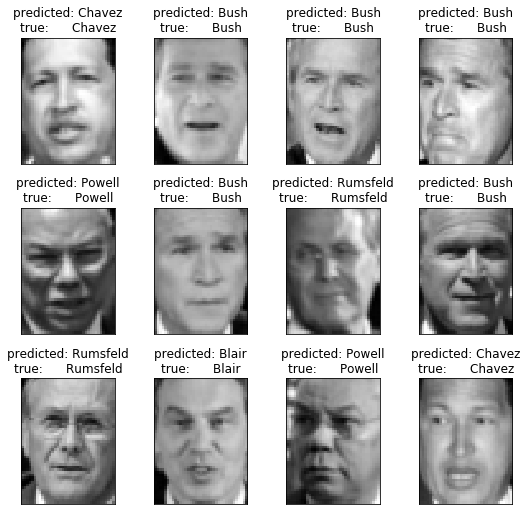

In [8]:
eigenfaces = pca.components_.reshape((n_components, height, width))
prediction_titles = [title(y_pred, y_test, faces.target_names, i)
                     for i in range(y_pred.shape[0])]
plot_gallery(X_test, prediction_titles, height, width)
plt.show()

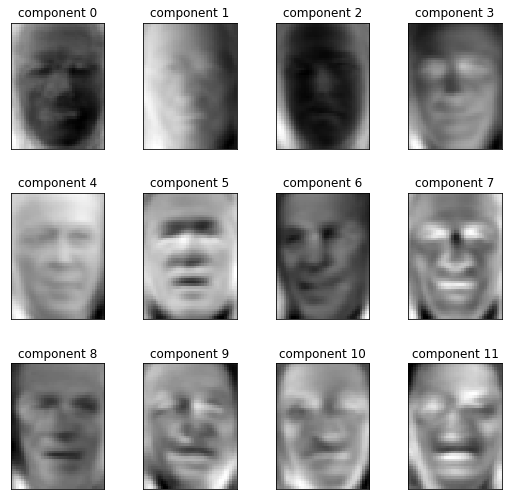

In [9]:
eigenface_titles = ["component %d" % i for i in range(components.shape[0])]
plot_gallery(components, eigenface_titles, height, width)
plt.show()